# Content 
1. Import Libraries and Data 
2. Clean Data
3. Data prep for regression 
4. Regression analysis 
5. Bonus: Performance inprovement after removing outliers. 

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
#importing data 
path = r'C:\Users\tlayt\OneDrive\Documents\CF Data Analytics\Acheivement 6\Final Project'

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'us_births_2016_2021.csv'), index_col = False)

## Clean Data

In [8]:
df.head(20)

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Average Birth Weight (lbs)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9,6.871473
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0,6.701940
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0,6.790123
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9,6.882496
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3,6.998016
5,Alabama,AL,2016,F,"Bachelor's degree (BA, AB, BS)",6,4453,30.3,3239.0,7.140653
6,Alabama,AL,2016,F,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,1910,32.0,3263.5,7.194665
7,Alabama,AL,2016,F,"Doctorate (PhD, EdD) or Professional Degree (M...",8,487,33.1,3196.7,7.047399
8,Alabama,AL,2016,F,Unknown or Not Stated,0,65,27.7,3083.9,6.798721
9,Alabama,AL,2016,M,8th grade or less,1,1188,27.6,3232.9,7.127205


In [9]:
df.shape

(5496, 10)

In [12]:
#remove unknown/not stated Edu level 
sub_df = df[df['Education Level Code']>0]

In [13]:
sub_df.shape

(4896, 10)

In [14]:
sub_df.head(15)

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Average Birth Weight (lbs)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9,6.871473
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0,6.701940
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0,6.790123
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9,6.882496
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3,6.998016
5,Alabama,AL,2016,F,"Bachelor's degree (BA, AB, BS)",6,4453,30.3,3239.0,7.140653
6,Alabama,AL,2016,F,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,1910,32.0,3263.5,7.194665
7,Alabama,AL,2016,F,"Doctorate (PhD, EdD) or Professional Degree (M...",8,487,33.1,3196.7,7.047399
9,Alabama,AL,2016,M,8th grade or less,1,1188,27.6,3232.9,7.127205
10,Alabama,AL,2016,M,9th through 12th grade with no diploma,2,3657,23.9,3121.2,6.880952


## Data Prep for regression

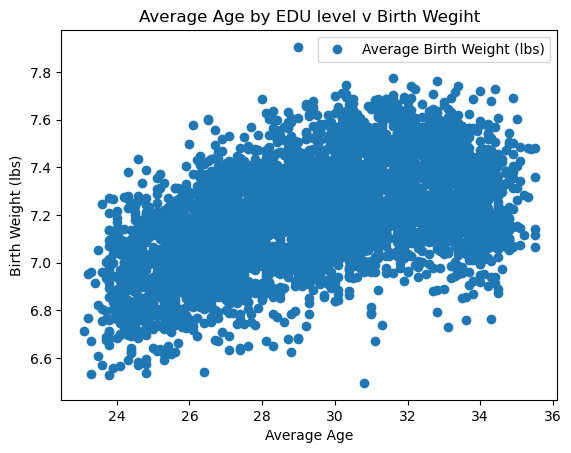

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_df.plot(x = 'Average Age of Mother (years)', y='Average Birth Weight (lbs)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average Age by EDU level v Birth Wegiht')  
plt.xlabel('Average Age')  
plt.ylabel('Birth Weight (lbs)')  
plt.show()

Hypothesis: The younger the agerage Age of mother by EDU level, the lighter the average weights of babies. (AKA - the less educated the mom, the younger the mom, the lighter the baby). 

Due to my average age data already being grouped by EDU level, EDU has to be taken into account in my hypothesis, otherwise just average age of mother would be misrepresented as it has already been grouped. 

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_df['Average Age of Mother (years)'].values.reshape(-1,1)
y = sub_df['Average Birth Weight (lbs)'].values.reshape(-1,1)

In [17]:
X

array([[27.8],
       [24.1],
       [25.4],
       ...,
       [30.7],
       [33. ],
       [33.3]])

In [18]:
y

array([[6.87147266],
       [6.70194003],
       [6.79012346],
       ...,
       [7.24426808],
       [7.16335979],
       [7.19135803]])

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis 

In [20]:
# Create a regression object.

regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

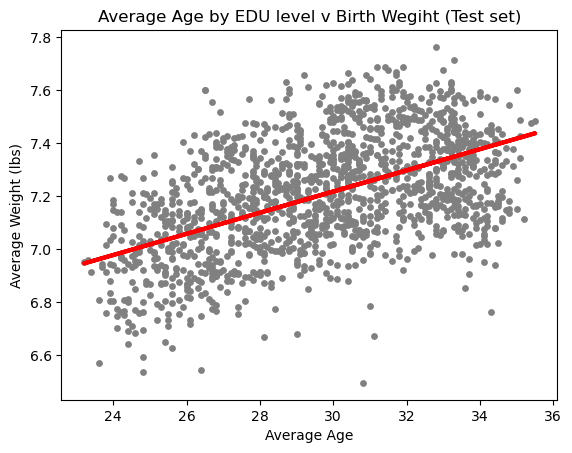

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Age by EDU level v Birth Wegiht (Test set)')
plot_test.xlabel('Average Age')
plot_test.ylabel('Average Weight (lbs)')
plot_test.show()

In general, the line has the upward trend of the data but the data is still pretty spread from the line. I don't think the r2 value will be very strong. I don't think this is the best model for the data due to its variance. 

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [25]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03994339]]
Mean squared error:  0.03475264592526735
R2 score:  0.2408793921540231


In [26]:
# Dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.443783,7.349420
1,7.003307,7.037862
2,7.349868,7.129731
3,7.524691,7.321460
4,7.520062,7.209618
5,7.074515,7.381375
6,6.990961,7.005907
7,7.510141,7.173669
8,7.116182,7.249562
9,7.068563,7.273528


This model is not indicating that it is a great fit for this data. While there is a positive slope, indicating as average age is increased, the baby weight does also increase slightly, the r2 value is ver low at 0.24. Additionally, the RMSE is 0.034 with data that is really only spanning from 6.4 to 7.8 lbs, so the spread of the data is large adn the line is not close to all the data. 
Due to the fact that this data has already been aggregated first and grouped by EDU level I think is having an impact on the analysis of the data whcih could be ultimately introducing bias into the model.Considering everything so far and with the original data set was conducted by humans, there is likely to be bias somewhere in the processs. Also, by removing the data with unknown edu level, I would have impacted the analysis as well. 

### Personal Curiosity bonus: Comparing to test data set

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03994339]]
Mean squared error:  0.03519213953275153
R2 score:  0.277141491310147


The r2 score did not increase very much. 

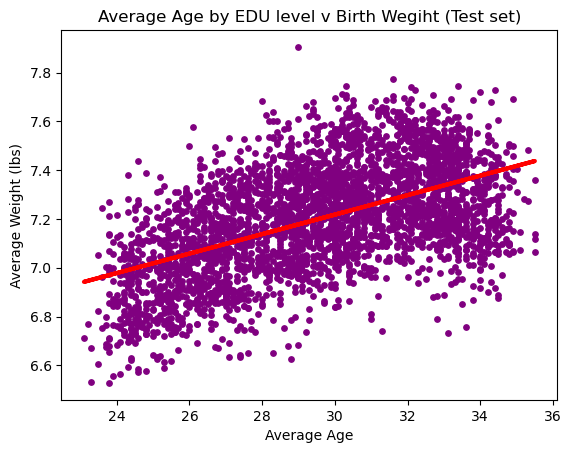

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='purple', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Average Age by EDU level v Birth Wegiht (Test set)')
plot_test.xlabel('Average Age')
plot_test.ylabel('Average Weight (lbs)')
plot_test.show()